In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import zscore
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [84]:
!pip install xgboost

    100% |████████████████████████████████| 686kB 8.9MB/s eta 0:00:01
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /Users/agorina/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!pip install imbalanced-learn

    100% |████████████████████████████████| 163kB 4.8MB/s ta 0:00:01
    100% |████████████████████████████████| 11.1MB 3.0MB/s eta 0:00:01
    100% |████████████████████████████████| 296kB 9.2MB/s eta 0:00:01
distributed 1.21.8 requires msgpack, which is not installed.
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import imblearn

In [90]:
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
from imblearn.over_sampling import SMOTE

In [180]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle

In [4]:
plt.rcParams["figure.figsize"] = [10,5]

# EDA

In [2]:
df = pd.read_csv('/Users/agorina/Desktop/Flatiron/Sephora_Classification/Data/True_Final_Sephora.csv')
df.head()

,Brand,Product,Price,Reviews_Count,Hearts,Clean,Allure
0,ARMANI BEAUTY,Lip Maestro Liquid Lipstick,38.0,1000.0,171.7,0,1
1,CHARLOTTE TILBURY,Matte Revolution Lipstick,34.0,719.0,135.3,0,0
2,TATCHA,The Kissu Lip Mask,28.0,262.0,41.3,1,0
3,GIVENCHY,Le Rouge Lipstick,38.0,640.0,111.2,0,0
4,NARS,Velvet Matte Lipstick Pencil,27.0,5000.0,350.4,0,0


In [6]:
df.describe()

,Price,Reviews_Count,Hearts,Clean,Allure
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45.266705,601.512000,3352.590450,0.108500,0.040500
std,39.990571,1405.831858,22525.189869,0.311089,0.197178
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,46.000000,6.400000,0.000000,0.000000
50%,35.000000,174.500000,19.500000,0.000000,0.000000
75%,52.000000,640.250000,71.300000,0.000000,0.000000
max,549.000000,15000.000000,643000.000000,1.000000,1.000000


Target Variable
Allure
0    1919
1      81
Name: Allure, dtype: int64


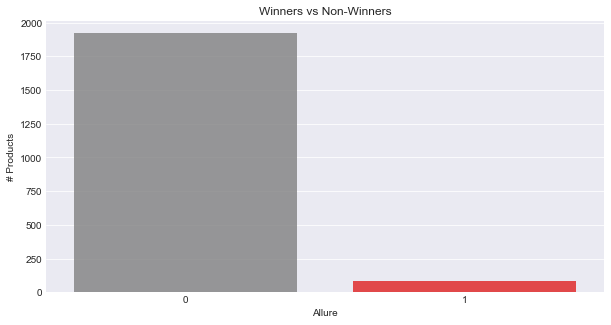

In [3]:
print('Target Variable')
print(df.groupby(['Allure']).Allure.count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['Allure'], alpha =.80, palette= ['grey','red'])
plt.title('Winners vs Non-Winners')
plt.ylabel('# Products')
plt.show()

Continuous Variables
                count         mean           std  min   25%    50%     75%  \
Price          2000.0    45.266705     39.990571  3.0  25.0   35.0   52.00   
Reviews_Count  2000.0   601.512000   1405.831858  0.0  46.0  174.5  640.25   
Hearts         2000.0  3352.590450  22525.189869  0.0   6.4   19.5   71.30   

                    max  
Price             549.0  
Reviews_Count   15000.0  
Hearts         643000.0  
--------------------------------------------------------------------------------
Discrete Variables
Clean
0    1783
1     217
Name: Clean, dtype: int64
Allure
0    1919
1      81
Name: Allure, dtype: int64


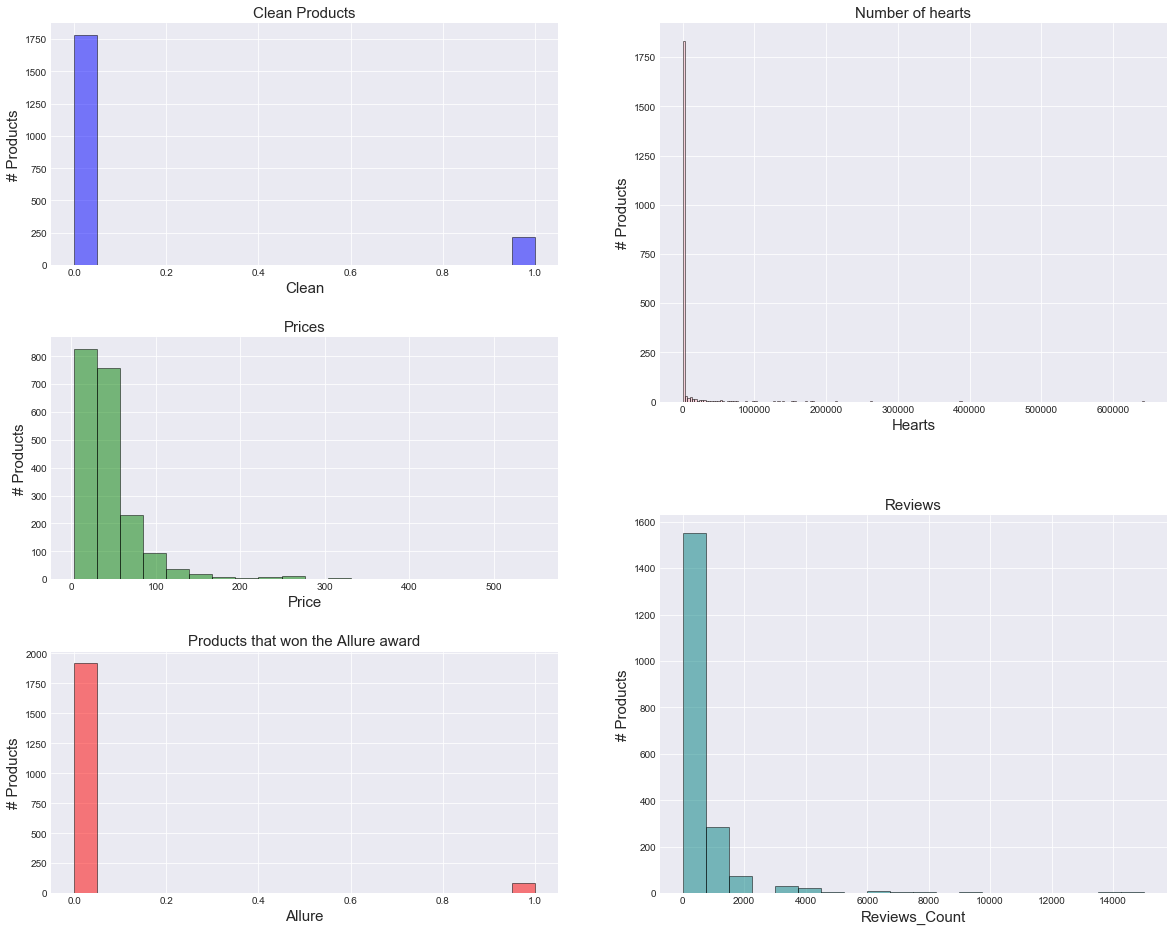

In [8]:
# Identify numeric features
print('Continuous Variables')
print(df[['Price', 'Reviews_Count', 'Hearts']].describe().transpose())
print('--'*40)
print('Discrete Variables')
print(df.groupby('Clean').Clean.count())
print(df.groupby('Allure').Allure.count())

# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(df['Clean'], bins = 20, alpha = .50,edgecolor= 'black',color ='blue')
ax1.set_xlabel('Clean', fontsize = 15)
ax1.set_ylabel('# Products',fontsize = 15)
ax1.set_title('Clean Products',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(df['Price'], bins = 20, alpha = .50,edgecolor= 'black',color ='green')
ax2.set_xlabel('Price',fontsize = 15)
ax2.set_ylabel('# Products',fontsize = 15)
ax2.set_title('Prices',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(df['Allure'], bins = 20, alpha = .50,edgecolor= 'black',color ='red')
ax3.set_xlabel('Allure',fontsize = 15)
ax3.set_ylabel('# Products',fontsize = 15)
ax3.set_title('Products that won the Allure award',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(df['Hearts'], bins = 200, alpha = .50,edgecolor= 'black',color ='lightpink')
ax4.set_xlabel('Hearts',fontsize = 15)
ax4.set_ylabel('# Products',fontsize = 15)
ax4.set_title('Number of hearts',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(df['Reviews_Count'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Reviews_Count',fontsize = 15)
ax5.set_ylabel('# Products',fontsize = 15)
ax5.set_title('Reviews',fontsize = 15)

plt.show()

Clean products Summary


Allure     0   1
Clean           
0       1713  70
1        206  11


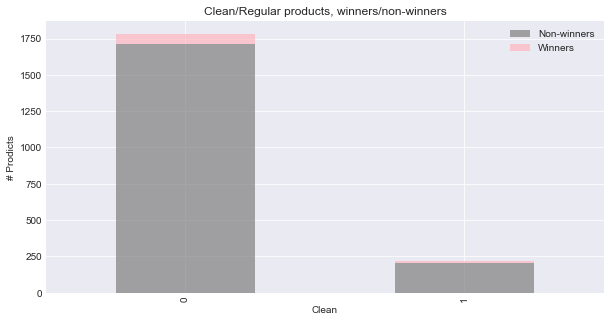

In [9]:
print('Clean products Summary')
print('\n')
print(df.groupby(['Clean','Allure']).Clean.count().unstack())

cleanp = df.groupby(['Clean','Allure']).Clean.count().unstack()
p1 = cleanp.plot(kind = 'bar', stacked = True, 
                   title = 'Clean/Regular products, winners/non-winners', 
                   color = ['grey','lightpink'], alpha = .70)
p1.set_xlabel('Clean')
p1.set_ylabel('# Prodicts')
p1.legend(['Non-winners','Winners'])
plt.show()

4% of non-clean products won the Allure award, 5% of clean products won.

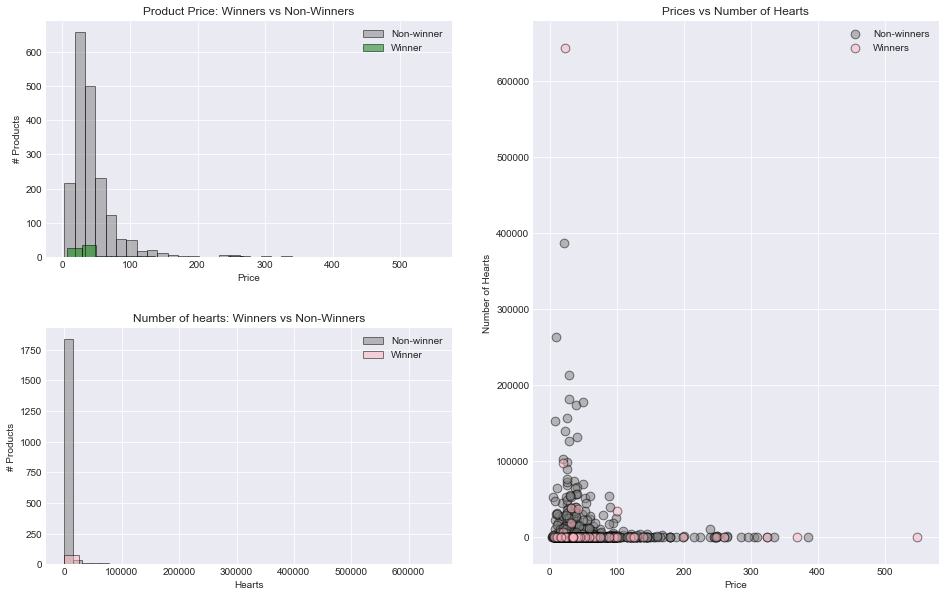

In [10]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['Allure'] ==0].Price, bins = 25, label ='Non-winner', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(df[df['Allure']==1].Price, bins = 25, label = 'Winner', alpha = .50, edgecolor = 'black',color = 'green')
ax1.set_title('Product Price: Winners vs Non-Winners')
ax1.set_xlabel('Price')
ax1.set_ylabel('# Products')
ax1.legend(loc = 'upper right')

ax2 = fig.add_subplot(223)
ax2.hist(df[df['Allure']==0].Hearts, bins = 25, label = 'Non-winner', alpha = .50, edgecolor ='black', color = 'grey')
ax2.hist(df[df['Allure']==1].Hearts, bins = 25, label = 'Winner', alpha = .50, edgecolor = 'black',color ='lightpink')
ax2.set_title('Number of hearts: Winners vs Non-Winners')
ax2.set_xlabel('Hearts')
ax2.set_ylabel('# Products')
ax2.legend(loc = 'upper right')

ax3 = fig.add_subplot(122)
ax3.scatter(x = df[df['Allure']==0].Price, y = df[df['Allure']==0].Hearts,
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Non-winners')
ax3.scatter(x = df[df['Allure']==1].Price, y = df[df['Allure']==1].Hearts,
                        alpha = .50,edgecolors= 'black',  c = 'lightpink', s= 75, label = 'Winners')
ax3.set_xlabel('Price')
ax3.set_ylabel('Number of Hearts')
ax3.set_title('Prices vs Number of Hearts')
ax3.legend()

plt.show()

# Logistic Regression. Very first model

In [11]:
X = df[['Price', 'Reviews_Count', 'Hearts', 'Clean']]
y = df['Allure']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))
dictionary

{'Price': 0.007251941124798853,
 'Reviews_Count': 0.00017031222889903,
 'Hearts': 2.6729811424081653e-06,
 'Clean': -0.2794728052249733}

In [17]:
y_pred_class = logreg.predict(X_test)

In [18]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.96


In [19]:
y_test.value_counts()

0    480
1     20
Name: Allure, dtype: int64

In [20]:
print('True:', y_test.values[0:10])
print('Pred:', y_pred_class[0:10])

True: [0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 0 0 0 0 0 0 0 0]


In [21]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[480   0]
 [ 20   0]]


In [22]:
print(metrics.recall_score(y_test, y_pred_class))

0.0


Due to severe class imbalance, the model fails to spot the winner, even though the overall accuracy score is 0.96. Therefore, the recall score is non-existent!

$\begin{pmatrix} 480 & 0 \\ 20 & 0 \end{pmatrix}$

# Split the data based on binary information in the last column

In [165]:
df_lose = df[df['Allure'] == 0]
df_win = df[df['Allure'] == 1]

In [166]:
df_lose.head()

,Brand,Product,Price,Reviews_Count,Hearts,Clean,Allure
1,CHARLOTTE TILBURY,Matte Revolution Lipstick,34.0,719.0,135.3,0,0
2,TATCHA,The Kissu Lip Mask,28.0,262.0,41.3,1,0
3,GIVENCHY,Le Rouge Lipstick,38.0,640.0,111.2,0,0
4,NARS,Velvet Matte Lipstick Pencil,27.0,5000.0,350.4,0,0
5,DIOR,Lip Glow Diormania,34.0,5.0,5.5,0,0


In [167]:
df_win.head()

,Brand,Product,Price,Reviews_Count,Hearts,Clean,Allure
0,ARMANI BEAUTY,Lip Maestro Liquid Lipstick,38.0,1000.0,171.7,0,1
102,ESTÉE LAUDER,Double Wear Stay-in-Place Foundation,43.0,5000.0,397.9,0,1
103,FENTY BEAUTY BY RIHANNA,Pro Filt'r Soft Matte Longwear Foundation,35.0,14000.0,603.4,0,1
104,URBAN DECAY,All Nighter Long-Lasting Makeup Setting Spray,33.0,9000.0,496.9,0,1
138,BENEFIT COSMETICS,BADgal BANG! Volumizing Mascara,25.0,4000.0,51.2,0,1


Look at the distributions

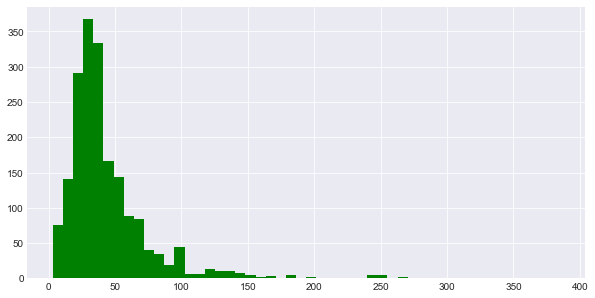

In [28]:
plot_price_lose = df_lose['Price'].hist(bins = 50, color='green')

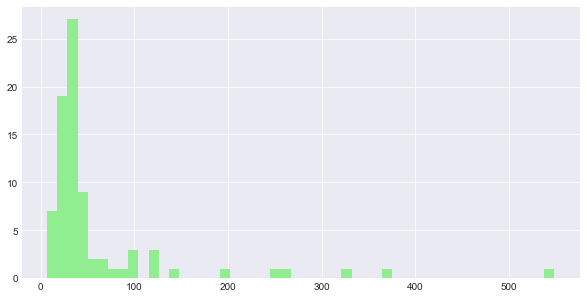

In [29]:
plot_price_win = df_win['Price'].hist(bins = 50, color='lightgreen')

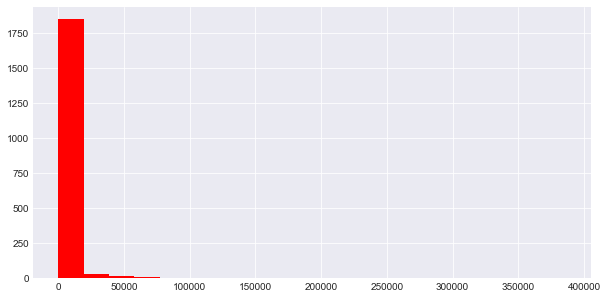

In [30]:
plot_hearts_lose = df_lose['Hearts'].hist(bins = 20, color='red')

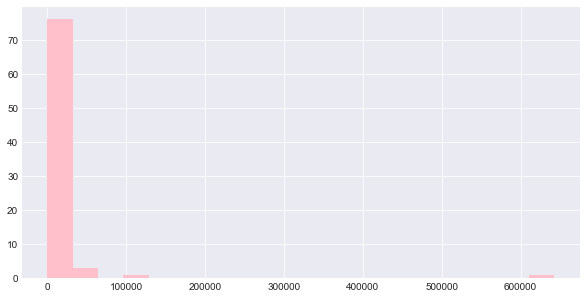

In [31]:
plot_hearts_win = df_win['Hearts'].hist(bins=20, color='pink')

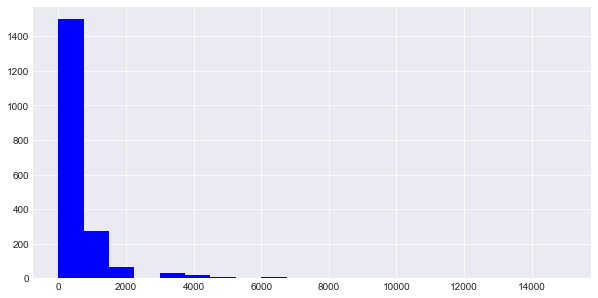

In [32]:
plot_reviews_lose = df_lose['Reviews_Count'].hist(bins=20, color='blue')

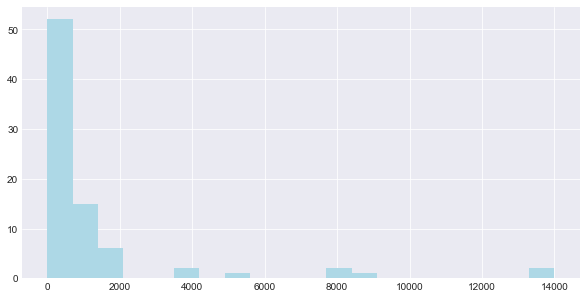

In [33]:
plot_reviews_win = df_win['Reviews_Count'].hist(bins=20, color='lightblue')

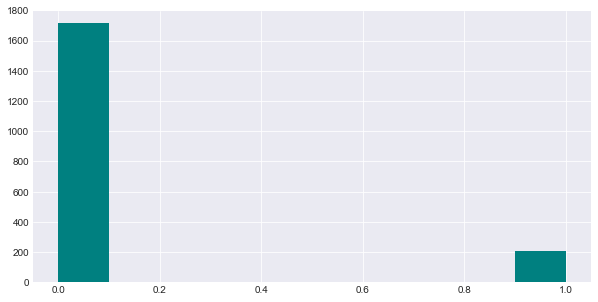

In [34]:
plot_clean_lose = df_lose['Clean'].hist(color='teal')

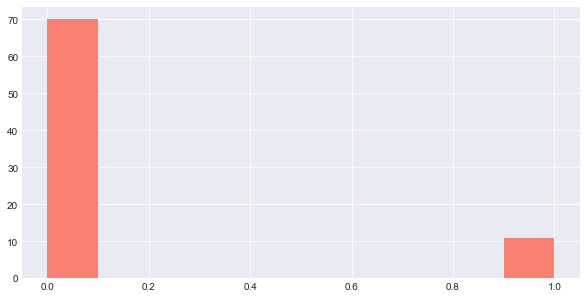

In [35]:
plot_clean_win = df_win["Clean"].hist(color='salmon')

# Random Under-sampling

In [36]:
count_class_lose, count_class_win = df.Allure.value_counts()

Random under-sampling:
1    81
0    81
Name: Allure, dtype: int64


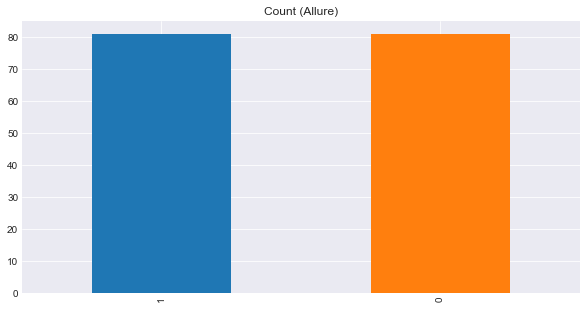

In [37]:
df_lose_under = df_lose.sample(count_class_win)
df_test_under = pd.concat([df_lose_under, df_win], axis=0)

print('Random under-sampling:')
print(df_test_under.Allure.value_counts())

df_test_under.Allure.value_counts().plot(kind='bar', title='Count (Allure)');

# Random Over-sampling

Random over-sampling:
1    1919
0    1919
Name: Allure, dtype: int64


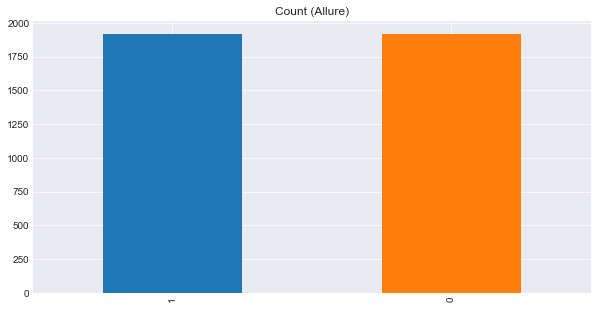

In [40]:
df_win_over = df_win.sample(count_class_lose, replace=True)
df_test_over = pd.concat([df_lose, df_win_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Allure.value_counts())

df_test_over.Allure.value_counts().plot(kind='bar', title="Count (Allure)")

In [43]:
df_test_under.Allure.value_counts()

1    81
0    81
Name: Allure, dtype: int64

# Logistic regression with undersampling

In [44]:
Xsu = df_test_under[['Price', 'Reviews_Count', 'Hearts', 'Clean']]
ysu = df_test_under['Allure']

In [45]:
X_train_su, X_test_su, y_train_su, y_test_su = train_test_split(Xsu, ysu, random_state=1)

In [46]:
logreg = LogisticRegression()
logreg.fit(X_train_su, y_train_su)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
ysu_pred_class = logreg.predict(X_test_su)

In [49]:
print(metrics.accuracy_score(y_test_su, ysu_pred_class))

0.5365853658536586


In [51]:
print('True:', y_test_su.values[0:10])
print('Pred:', ysu_pred_class[0:10])

True: [0 0 1 0 1 0 1 0 1 0]
Pred: [0 0 1 0 0 0 0 0 1 1]


This model performs insignificantly better than random guessing. 

# Logistic regression with oversampling

In [52]:
df_test_over.head()

,Brand,Product,Price,Reviews_Count,Hearts,Clean,Allure
1,CHARLOTTE TILBURY,Matte Revolution Lipstick,34.0,719.0,135.3,0,0
2,TATCHA,The Kissu Lip Mask,28.0,262.0,41.3,1,0
3,GIVENCHY,Le Rouge Lipstick,38.0,640.0,111.2,0,0
4,NARS,Velvet Matte Lipstick Pencil,27.0,5000.0,350.4,0,0
5,DIOR,Lip Glow Diormania,34.0,5.0,5.5,0,0


In [53]:
Xso = df_test_over[['Price', 'Reviews_Count', 'Hearts', 'Clean']]
yso = df_test_over['Allure']

In [54]:
X_train_so, X_test_so, y_train_so, y_test_so = train_test_split(Xso, yso, random_state=1)

In [55]:
logreg = LogisticRegression()
logreg.fit(X_train_so, y_train_so)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
yso_pred_class = logreg.predict(X_test_so)

In [57]:
print(metrics.accuracy_score(y_test_so, yso_pred_class))

0.49166666666666664


In [60]:
print('True:', y_test_so.values[0:25])
print('Predicted:', yso_pred_class[0:25])

True: [0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1]
Predicted: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# SMOTE and Tomek links

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [75]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [76]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

In [77]:
logreg = LogisticRegression()
logreg.fit(X_sm, y_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
ysm_pred_class = logreg.predict(X_test)

In [79]:
print(metrics.accuracy_score(y_test, ysm_pred_class))

0.04


In [80]:
print('True:', y_test.values[0:25])
print('Predicted:', ysm_pred_class[0:25])

True: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [81]:
print(classification_report(y_test, ysm_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       480
           1       0.04      1.00      0.08        20

    accuracy                           0.04       500
   macro avg       0.02      0.50      0.04       500
weighted avg       0.00      0.04      0.00       500



In [84]:
smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_sample(X, y)

In [85]:
logreg = LogisticRegression()
logreg.fit(X_smt, y_smt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
ysmt_pred_class = logreg.predict(X_test)

In [87]:
print(metrics.accuracy_score(y_test, ysmt_pred_class))

0.04


In [88]:
print('True:', y_test.values[0:25])
print('Predicted:', ysmt_pred_class[0:25])

True: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [89]:
print(classification_report(y_test, ysmt_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       480
           1       0.04      1.00      0.08        20

    accuracy                           0.04       500
   macro avg       0.02      0.50      0.04       500
weighted avg       0.00      0.04      0.00       500



Trying a different model, tree-based. XGBoost with SMOTETomek

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [95]:
smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_sample(X, y)

In [96]:
clf = XGBClassifier()
clf.fit(X_smt, y_smt)

training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 76.67%
Validation accuracy: 75.0%


In [97]:
print(metrics.accuracy_score(y_test, test_preds))

0.75


In [98]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85       482
           1       0.10      0.72      0.17        18

    accuracy                           0.75       500
   macro avg       0.54      0.74      0.51       500
weighted avg       0.95      0.75      0.83       500



In [101]:
print('True:', y_test.values[45:65])
print('Predicted:', test_preds[45:65])

True: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
Predicted: [0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1]


In [106]:
y_smt.value_counts()

1    1788
0    1788
Name: Allure, dtype: int64

Try the same strategy, but only with SMOTE, no additional tomek

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [111]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

In [112]:
y_sm.value_counts()

1    1437
0    1437
Name: Allure, dtype: int64

In [113]:
clf = XGBClassifier()
clf.fit(X_sm, y_sm)

training_preds_sm = clf.predict(X_train)
test_preds_sm = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds_sm)
test_accuracy = accuracy_score(y_test, test_preds_sm)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 78.6%
Validation accuracy: 72.4%


In [114]:
print(classification_report(y_test, test_preds_sm))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       482
           1       0.05      0.39      0.09        18

    accuracy                           0.72       500
   macro avg       0.51      0.56      0.46       500
weighted avg       0.94      0.72      0.81       500



In [115]:
print('True:', y_test.values[0:25])
print('Predicted:', test_preds_sm[0:25])

True: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
Predicted: [1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0]


Same thing, but with Tomek links and no SMOTE

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [119]:
tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_sample(X_train, y_train)

In [120]:
y_sm.value_counts()

1    1437
0    1437
Name: Allure, dtype: int64

In [121]:
clf = XGBClassifier()
clf.fit(X_tl, y_tl)

training_preds_tl = clf.predict(X_train)
test_preds_tl = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds_tl)
test_accuracy = accuracy_score(y_test, test_preds_tl)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 96.07%
Validation accuracy: 96.2%


In [122]:
print(classification_report(y_test, test_preds_tl))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       482
           1       0.00      0.00      0.00        18

    accuracy                           0.96       500
   macro avg       0.48      0.50      0.49       500
weighted avg       0.93      0.96      0.95       500



In [123]:
print('True:', y_test.values[0:25])
print('Predicted:', test_preds_tl[0:25])

True: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
Predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# SMOTE+XGBoost best model so far:

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [148]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

In [150]:
clf = XGBClassifier()
clf.fit(X_sm, y_sm)

training_preds_sm = clf.predict(X_train)
test_preds_sm = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds_sm)
test_accuracy = accuracy_score(y_test, test_preds_sm)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 78.33%
Validation accuracy: 72.8%


In [151]:
print(metrics.confusion_matrix(y_test, test_preds_sm))

[[357 125]
 [ 11   7]]


In [152]:
print(classification_report(y_test, test_preds_sm))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       482
           1       0.05      0.39      0.09        18

    accuracy                           0.73       500
   macro avg       0.51      0.56      0.47       500
weighted avg       0.94      0.73      0.81       500



Now when I created an undersampled dataframe of shuffled rows, I will try my model again.

In [189]:
Xsh = edf[['Price', 'Reviews_Count', 'Hearts', 'Clean']]
ysh = edf['Allure']

In [190]:
Xsh_train, Xsh_test, ysh_train, ysh_test = train_test_split(Xsh, ysh, random_state=42)

In [191]:
clf = XGBClassifier()
clf.fit(Xsh, ysh)

training_preds = clf.predict(Xsh_train)
test_preds = clf.predict(Xsh_test)

training_accuracy = accuracy_score(ysh_train, training_preds)
test_accuracy = accuracy_score(ysh_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 93.39%
Validation accuracy: 90.24%


In [192]:
print(metrics.confusion_matrix(ysh_test, test_preds))

[[20  1]
 [ 3 17]]


In [195]:
print(classification_report(ysh_test, test_preds))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.94      0.85      0.89        20

    accuracy                           0.90        41
   macro avg       0.91      0.90      0.90        41
weighted avg       0.91      0.90      0.90        41



# GridSearch!

In [153]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [154]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_sm, y_sm)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_sm)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_sm, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 98.12%
Validation accuracy: 90.0%


In [155]:
aggs = df.groupby('Allure').agg(['mean', 'std'])
aggs

Price            Reviews_Count                     Hearts  \
             mean        std          mean          std          mean   
Allure                                                                  
0       44.557905  36.727398    573.714956  1320.428467   3035.426107   
1       62.059136  85.578456   1260.061728  2669.376066  10866.644444   

                         Clean            
                 std      mean       std  
Allure                                    
0       17565.918811  0.107348  0.309635  
1       72255.936525  0.135802  0.344713

In [181]:
df_lose = shuffle(df_lose)

In [182]:
df_lose.head()

,Brand,Product,Price,Reviews_Count,Hearts,Clean,Allure
494,NARS,Tinted Glow Booster,39.0,15.0,5000.0,0,0
1826,BELIF,Problem Solution Cleansing Foam,24.0,104.0,5.1,0,0
1767,OLEHENRIKSEN,Glow2OH™ Dark Spot Toner,29.0,2000.0,71.4,1,0
1171,TOM FORD,Fucking Fabulous,335.0,89.0,11.5,0,0
1543,FENTY BEAUTY BY RIHANNA,"Full Frontal Volume, Lift & Curl Mascara",24.0,1000.0,18.9,0,0


In [170]:
df_win.shape

(81, 7)

In [183]:
df_lose_81 = df_lose[:81]

In [184]:
df_lose_81.shape

(81, 7)

In [186]:
twodf = [df_win, df_lose_81]
edf = pd.concat(twodf, ignore_index=True)
edf = shuffle(edf)
edf.head()

,Brand,Product,Price,Reviews_Count,Hearts,Clean,Allure
6,ST. TROPEZ,Self Tan Purity Bronzing Water Face Mist,30.0,144.0,9.5,0,1
128,MURAD,Nutrient-Charged Water Gel,60.0,556.0,14.7,0,0
126,OLEHENRIKSEN,Transforming Walnut Scrub,28.0,1000.0,48.1,0,0
40,PAT MCGRATH LABS,Mothership V Eyeshadow Palette - Bronze Seduction,125.0,384.0,61.4,0,1
161,NATASHA DENONA,Sunrise Eyeshadow Palette,65.0,371.0,48.4,0,0


In [187]:
agg_ss = edf.groupby('Allure').agg(['mean', 'std'])
agg_ss

Price            Reviews_Count                     Hearts  \
             mean        std          mean          std          mean   
Allure                                                                  
0       44.840741  40.696129    601.271605   912.965744   3500.551852   
1       62.059136  85.578456   1260.061728  2669.376066  10866.644444   

                         Clean            
                 std      mean       std  
Allure                                    
0       18116.125371  0.061728  0.242161  
1       72255.936525  0.135802  0.344713

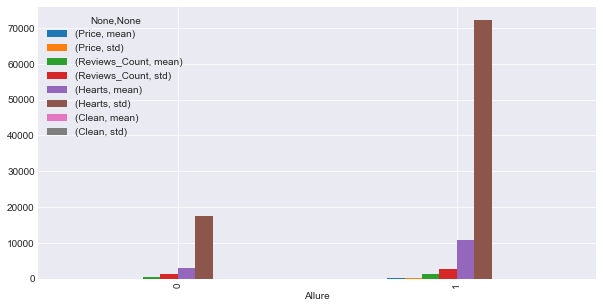

In [156]:
aggs.plot.bar()

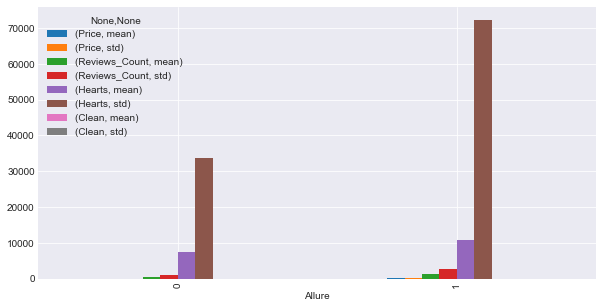

In [179]:
agg_ss.plot.bar()

In [158]:
#Checking for linear independence

correlation = df[['Price', 'Reviews_Count', 'Hearts', 'Clean']].corr()
correlation

,Price,Reviews_Count,Hearts,Clean
Price,1.000000,-0.118341,-0.048286,-0.020844
Reviews_Count,-0.118341,1.000000,0.245439,-0.016645
Hearts,-0.048286,0.245439,1.000000,-0.020155
Clean,-0.020844,-0.016645,-0.020155,1.000000


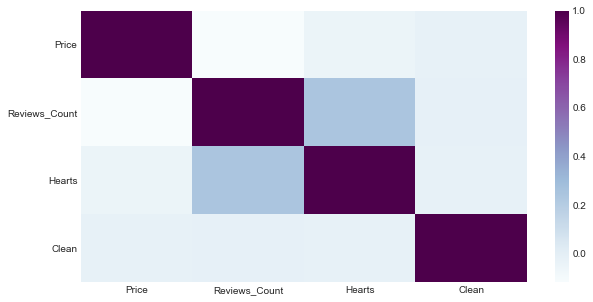

In [160]:
sns.heatmap(correlation, cmap='BuPu')

# Trying Naive Bayes

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 71
